# URL Threat Assessment: Detecting Phishing Attempts

The ubiquitous nature of the Internet has facilitated not only seamless connectivity but also created avenues for malicious activities such as Phishing. Phishers exploit social engineering tactics or create counterfeit websites to illicitly acquire sensitive information, including account credentials, from individuals and organizations. Despite numerous proposed detection methods, Phishers continually adapt their strategies to evade detection mechanisms. Machine Learning (ML) has emerged as a potent tool in combating such nefarious activities due to its ability to identify common characteristics inherent in most Phishing attacks.

## The methodology outlined in this technical document encompasses the following steps:

1. Data Acquisition and Preparation:
   - Loading the dataset containing instances of suspected Phishing websites.
   - Conducting exploratory data analysis (EDA) to gain insights into the dataset's structure and contents.
   
2. Data Visualization:
   - Employing visualization techniques to illustrate patterns and trends within the dataset.
   
3. Data Preprocessing and Splitting:
   - Preprocessing the data to ensure compatibility with ML algorithms, including feature scaling and encoding categorical variables.
   - Partitioning the dataset into training and testing sets to facilitate model evaluation.
   
4. Model Training:
   - Implementing various ML algorithms, such as decision trees, support vector machines (SVM), and neural networks, to train predictive models.
   
5. Model Comparison:
   - Evaluating the performance of trained models using appropriate metrics, such as accuracy, precision, recall, and F1 score.
   - Comparing the efficacy of different ML algorithms in accurately classifying Phishing websites.

6. Conclusion:
   - Summarizing the findings and insights gleaned from the experimental analysis.
   - Discussing the implications of the results and potential avenues for future research in enhancing Phishing detection techniques.

By following this systematic approach, organizations can leverage ML-based solutions to bolster their defenses against Phishing attacks and safeguard sensitive information from unauthorized access and exploitation.

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading:

The dataset utilized in this study is sourced from Kaggle, accessible via the following link: [Phishing Website Detector Dataset](https://www.kaggle.com/eswarchandt/phishing-website-detector).

This dataset comprises over 11,000 website URLs, each accompanied by 30 parameters indicative of website characteristics. Additionally, each sample is labeled with a class identifier denoting whether it is categorized as a phishing website (1) or not (-1).

The dataset overview reveals a total of 11,054 samples, each consisting of 32 features. Interested parties can obtain the dataset by downloading it from the provided link.

In [2]:
#Loading data into dataframe

data = pd.read_csv(r"../input/phishing-website-detector/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Exploratory Data Analysis (EDA):

During this phase, various methods pertaining to dataframes are employed to examine the dataset and its attributes.

In [3]:
#Shape of dataframe

data.shape

(11054, 32)

In [4]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


Data Set Summary :

1. The dataset comprises 11,054 instances and 31 features.
2. Of these, 30 features are independent, while 1 is dependent.
3. All features are of integer data type, obviating the need for LabelEncoder transformation.
4. No outliers are detected within the dataset.
5. The dataset exhibits no missing values.

## 3. Data Visualization:
In this phase, various plots and graphs are generated to analyze the distribution of data and explore relationships between features.

In [9]:
# #Correlation heatmap

# plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(), annot=True)
# plt.show()

array([[<Axes: title={'center': 'UsingIP'}>,
        <Axes: title={'center': 'LongURL'}>,
        <Axes: title={'center': 'ShortURL'}>,
        <Axes: title={'center': 'Symbol@'}>,
        <Axes: title={'center': 'Redirecting//'}>,
        <Axes: title={'center': 'PrefixSuffix-'}>],
       [<Axes: title={'center': 'SubDomains'}>,
        <Axes: title={'center': 'HTTPS'}>,
        <Axes: title={'center': 'DomainRegLen'}>,
        <Axes: title={'center': 'Favicon'}>,
        <Axes: title={'center': 'NonStdPort'}>,
        <Axes: title={'center': 'HTTPSDomainURL'}>],
       [<Axes: title={'center': 'RequestURL'}>,
        <Axes: title={'center': 'AnchorURL'}>,
        <Axes: title={'center': 'LinksInScriptTags'}>,
        <Axes: title={'center': 'ServerFormHandler'}>,
        <Axes: title={'center': 'InfoEmail'}>,
        <Axes: title={'center': 'AbnormalURL'}>],
       [<Axes: title={'center': 'WebsiteForwarding'}>,
        <Axes: title={'center': 'StatusBarCust'}>,
        <Axes: title=

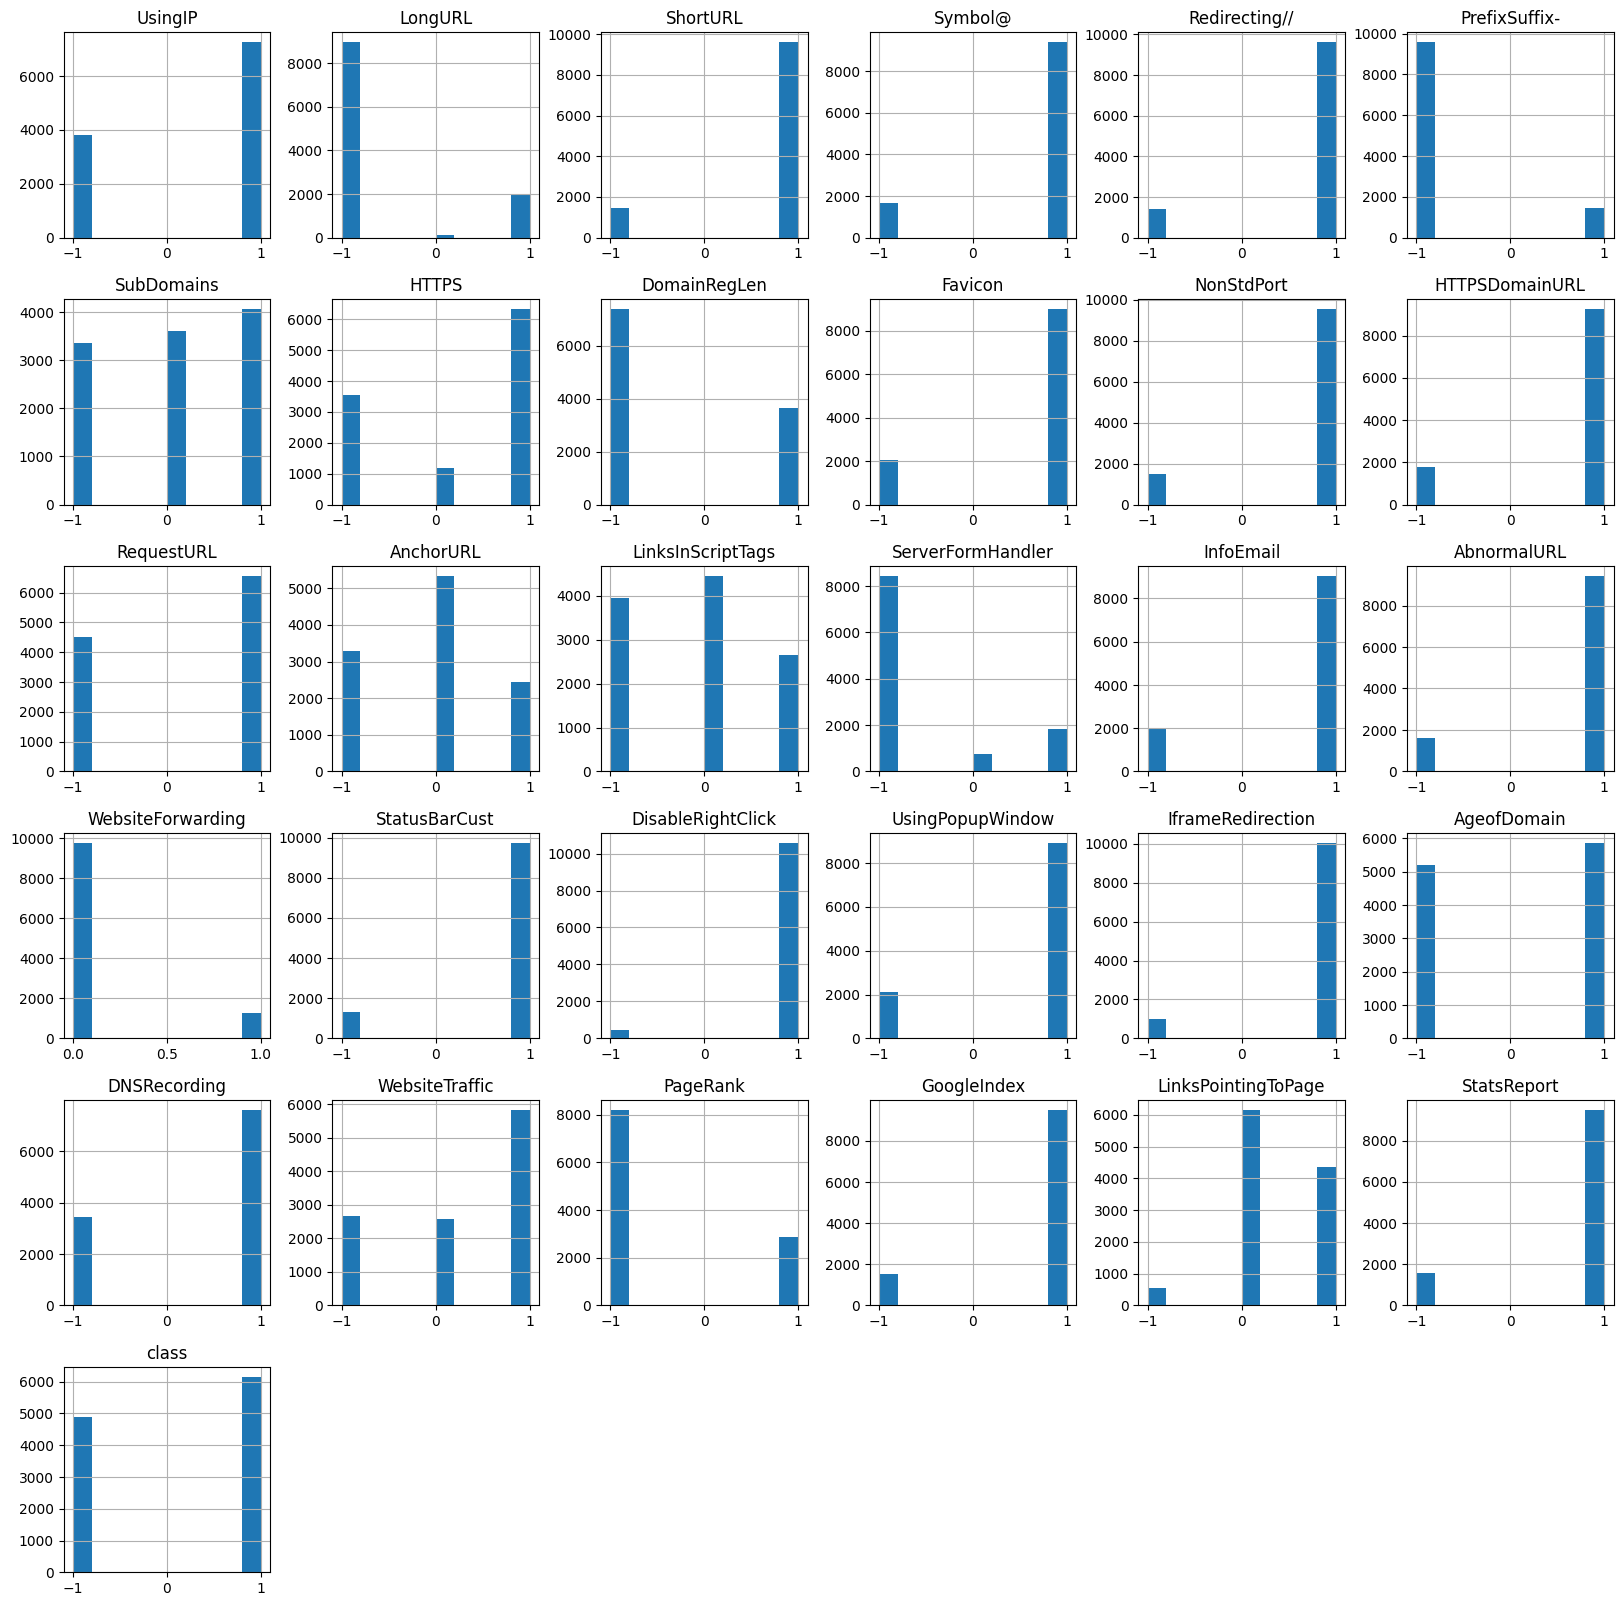

In [10]:
data.hist(figsize=(20,20))

In [11]:
# #pairplot for particular features

# df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
# sns.pairplot(data = df,hue="class",corner=True);


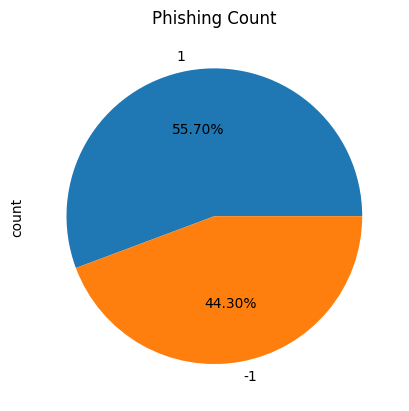

In [12]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Data Splitting:

The dataset is partitioned into training and testing sets using an 70-30 split ratio.

In [13]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [14]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7737, 30), (7737,), (3317, 30), (3317,))

## Algorithms Used:

Supervised machine learning, a prevalent technique, is employed to predict outcomes from a given set of features, utilizing examples of feature-label pairs. In regression problems like ours, where the prediction entails a continuous value, models are trained on labeled data to accurately predict outcomes for new instances.

### Selected Regression Models:

1. **Naive Bayes (NB)**:
   - Naive Bayes is a probabilistic classifier based on Bayes' theorem with the "naive" assumption of feature independence. Despite its simplicity, it's effective for classification tasks.


2. **Decision Tree**:
   - Decision Tree is a non-parametric supervised learning method used for classification and regression tasks. It partitions the feature space into segments to make predictions.


3. **Gradient Boosting Classifier**:
   - The Gradient Boosting Classifier is a powerful ensemble learning algorithm that combines multiple weak learners to create a strong predictive model. It sequentially trains a series of decision trees, each correcting the errors of its predecessors, ultimately producing a highly accurate model..


4. **Multilayer Perceptrons (MLP)**:
   - MLP is a type of artificial neural network composed of multiple layers of nodes, capable of learning complex patterns in data.


### Evaluation Metrics:

- **Root Mean Squared Error (RMSE)**:
  - RMSE measures the average deviation of predicted values from the actual values, calculated as:       
    \[ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]


- **Accuracy**:
  - Accuracy measures the proportion of correctly classified instances out of the total instances:      
    \[ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} \]


- **F1 Score**:
  - F1 Score is the harmonic mean of precision and recall, providing a balance between false positives and false negatives:              
    \[ F1 = 2 \times \frac{precision \times recall}{precision + recall} \]

In [15]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []
MAE=[]

#function to call for storing the results
def storeResults(model, a,b,c,d,e):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))
  MAE.append(round(e, 3))

<!-- ## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems. -->

## 5.1. Naive Bayes Classifier:

The Naive Bayes algorithm is a supervised learning method based on Bayes' theorem, primarily utilized for classification tasks. It is particularly effective in scenarios involving high-dimensional datasets, such as text and image classification. Naive Bayes Classifier is renowned for its simplicity and efficiency, enabling the rapid development of machine learning models capable of making swift predictions.

  #### Mathematical Equivalent:
   - The probability of a class given a set of features is calculated using Bayes' theorem:
     \[ P(Y|X) = \frac{P(X|Y) \cdot P(Y)}{P(X)} \]
   - The "naive" assumption of feature independence simplifies the calculation:
     \[ P(X|Y) = P(X_1|Y) \cdot P(X_2|Y) \cdot ... \cdot P(X_n|Y) \]



In [16]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [17]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [18]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))
print()
mae_score_train_nb = metrics.mean_absolute_error(y_train,y_train_nb)
mae_score_test_nb = metrics.mean_absolute_error(y_test,y_test_nb)
print("Naive Bayes Classifier : MAE on training Data: {:.3f}".format(mae_score_train_nb))
print("Naive Bayes Classifier : MAE on test Data: {:.3f}".format(mae_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.606
Naive Bayes Classifier : Accuracy on test Data: 0.606

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.460

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.299

Naive Bayes Classifier : precision on training Data: 0.996
Naive Bayes Classifier : precision on test Data: 0.996

Naive Bayes Classifier : MAE on training Data: 0.788
Naive Bayes Classifier : MAE on test Data: 0.789


In [19]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

          -1       0.53      1.00      0.69      1455
           1       1.00      0.30      0.46      1862

    accuracy                           0.61      3317
   macro avg       0.76      0.65      0.57      3317
weighted avg       0.79      0.61      0.56      3317



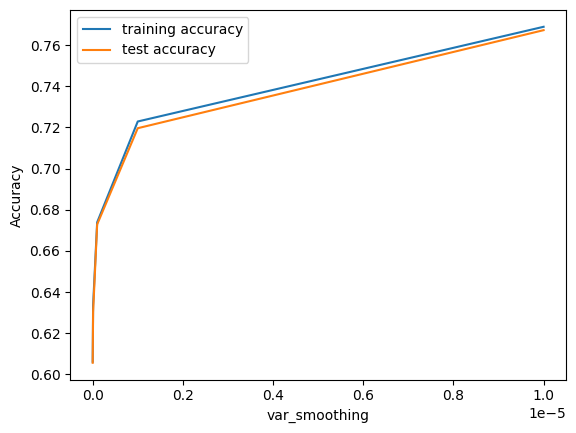

In [20]:

training_accuracy = []
test_accuracy = []

# try different var_smoothing values
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
for value in var_smoothing_values:
    nb_test = GaussianNB(var_smoothing=value)
    nb_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(nb_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(nb_test.score(X_test, y_test))
    
# plotting the training & testing accuracy for different var_smoothing values
plt.plot(var_smoothing_values, training_accuracy, label="training accuracy")
plt.plot(var_smoothing_values, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("var_smoothing")
plt.legend()
plt.show()


In [21]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb,mae_score_train_nb)

## 5.2. Decision Trees Classifier:

Decision Trees are a versatile supervised learning technique applicable to both classification and regression problems. However, they are predominantly employed for solving classification tasks. Decision Trees exhibit a tree-like structure, where internal nodes represent the features of a dataset, branches denote decision rules, and each leaf node signifies an outcome. This intuitive structure facilitates the interpretation of decision-making processes and enables the generation of human-readable rules for classification tasks.

  #### Mathematical Equivalent:
   - Decision trees recursively split the feature space based on conditions to maximize information gain or minimize impurity, such as Gini impurity or entropy.



In [22]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [23]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [24]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))
print()

mae_score_train_tree = metrics.mean_absolute_error(y_train,y_train_tree)
mae_score_test_tree = metrics.mean_absolute_error(y_test,y_test_tree)
print("Decision Tree : MAE on training Data: {:.3f}".format(mae_score_train_tree))
print("Decision Tree : MAE on test Data: {:.3f}".format(mae_score_test_tree))


Decision Tree : Accuracy on training Data: 0.992
Decision Tree : Accuracy on test Data: 0.961

Decision Tree : f1_score on training Data: 0.993
Decision Tree : f1_score on test Data: 0.965

Decision Tree : Recall on training Data: 0.992
Decision Tree : Recall on test Data: 0.967

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.963

Decision Tree : MAE on training Data: 0.016
Decision Tree : MAE on test Data: 0.079


In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95      1455
           1       0.96      0.97      0.96      1862

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



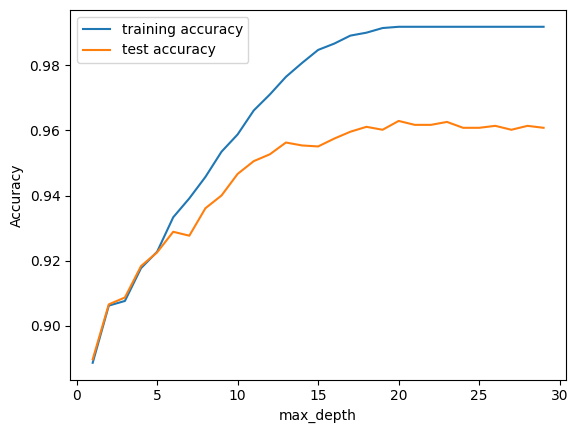

In [26]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree,mae_score_train_tree)

## 5.3. Gradient Boosting Classifier:

Gradient boosting classifiers belong to a class of machine learning algorithms that aggregate multiple weak learners to form a robust predictive model. Typically, decision trees serve as the base learners in gradient boosting. These algorithms effectively address the bias-variance trade-off, a fundamental challenge in machine learning. Unlike bagging algorithms that primarily mitigate high variance, boosting techniques such as gradient boosting address both bias and variance, resulting in more effective models. 

In [28]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [29]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [30]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))
print()

mae_score_train_gbc = metrics.mean_absolute_error(y_train,y_train_gbc)
mae_score_test_gbc = metrics.mean_absolute_error(y_test,y_test_gbc)
print("Gradient Boosting Classifier : MAE on training Data: {:.3f}".format(mae_score_train_gbc))
print("Gradient Boosting Classifier : MAE on test Data: {:.3f}".format(mae_score_test_gbc))


Gradient Boosting Classifier : Accuracy on training Data: 0.990
Gradient Boosting Classifier : Accuracy on test Data: 0.968

Gradient Boosting Classifier : f1_score on training Data: 0.991
Gradient Boosting Classifier : f1_score on test Data: 0.972

Gradient Boosting Classifier : Recall on training Data: 0.993
Gradient Boosting Classifier : Recall on test Data: 0.981

Gradient Boosting Classifier : precision on training Data: 0.989
Gradient Boosting Classifier : precision on test Data: 0.963

Gradient Boosting Classifier : MAE on training Data: 0.020
Gradient Boosting Classifier : MAE on test Data: 0.064


In [31]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.98      0.95      0.96      1455
           1       0.96      0.98      0.97      1862

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



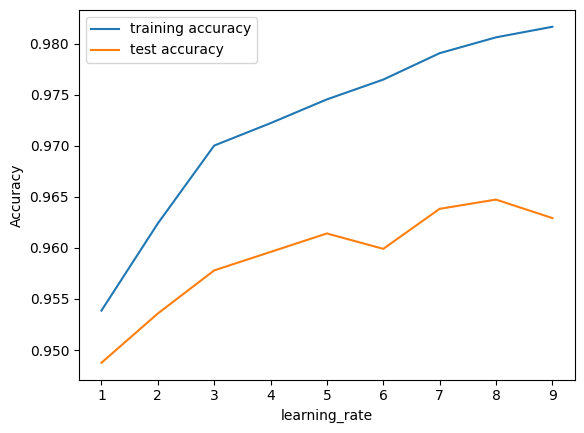

In [32]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

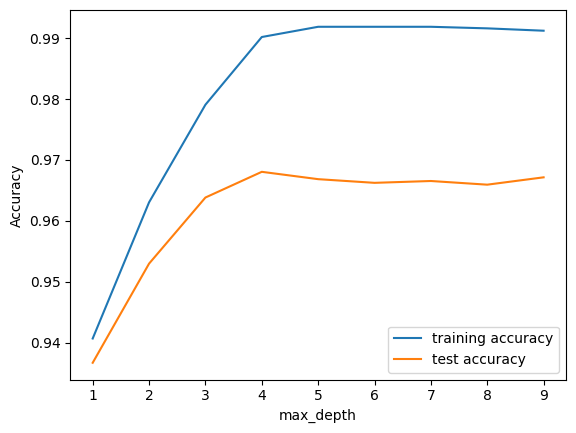

In [33]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [34]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc,mae_score_train_gbc)

## 5.4. Multi-layer Perceptron Classifier:

The Multi-layer Perceptron (MLP) classifier, abbreviated as MLPClassifier, is an instance of a Neural Network-based classification algorithm. Unlike traditional classifiers such as Support Vector Machines or Naive Bayes, MLPClassifier utilizes a Neural Network architecture to perform classification tasks.

#### **Neural Network Structure**:
MLP is a type of artificial neural network characterized by multiple layers of interconnected nodes, known as neurons. Each neuron applies an activation function to its inputs and passes the result to subsequent layers, enabling the network to learn complex patterns in the data.

#### **Mathematical Formulation**:
  - The output of each neuron is computed using an activation function, typically a nonlinear function like the sigmoid or rectified linear unit (ReLU).
  - Forward propagation is employed to compute the output of the network, where inputs are sequentially passed through the network layers to generate predictions.


In [35]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [36]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [37]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))
print()


mae_score_train_mlp = metrics.mean_absolute_error(y_train,y_train_mlp)
mae_score_test_mlp = metrics.mean_absolute_error(y_test,y_test_mlp)
print("Multi-layer Perceptron : MAE on training Data: {:.3f}".format(mae_score_train_mlp))
print("Multi-layer Perceptron : MAE on test Data: {:.3f}".format(mae_score_test_mlp))


Multi-layer Perceptron : Accuracy on training Data: 0.988
Multi-layer Perceptron : Accuracy on test Data: 0.967

Multi-layer Perceptron : f1_score on training Data: 0.989
Multi-layer Perceptron : f1_score on test Data: 0.989

Multi-layer Perceptron : Recall on training Data: 0.996
Multi-layer Perceptron : Recall on test Data: 0.983

Multi-layer Perceptron : precision on training Data: 0.982
Multi-layer Perceptron : precision on test Data: 0.960

Multi-layer Perceptron : MAE on training Data: 0.025
Multi-layer Perceptron : MAE on test Data: 0.065


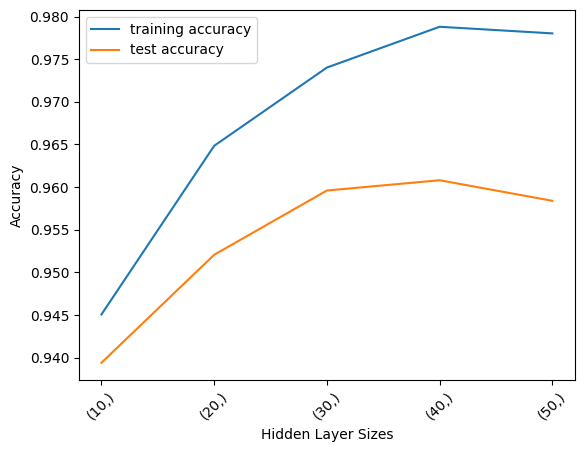

In [38]:

training_accuracy = []
test_accuracy = []

# try different hidden layer sizes
layer_sizes = [(10,), (20,), (30,), (40,), (50,)]
for sizes in layer_sizes:
    mlp_test = MLPClassifier(hidden_layer_sizes=sizes)
    mlp_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(mlp_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(mlp_test.score(X_test, y_test))
    
# plotting the training & testing accuracy for different hidden layer sizes
plt.plot([str(sizes) for sizes in layer_sizes], training_accuracy, label="training accuracy")
plt.plot([str(sizes) for sizes in layer_sizes], test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Hidden Layer Sizes")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [39]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp,mae_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [40]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                        'Mean Absolute Error': MAE,
                      })

In [41]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision,Mean Absolute Error
0,Naive Bayes Classifier,0.606,0.460,0.292,0.996,0.788
1,Decision Tree,0.961,0.965,0.992,0.993,0.016
2,Gradient Boosting Classifier,0.968,0.972,0.993,0.989,0.020
3,Multi-layer Perceptron,0.967,0.971,0.996,0.982,0.025


In [42]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [43]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision,Mean Absolute Error
0,Gradient Boosting Classifier,0.968,0.972,0.993,0.989,0.020
1,Multi-layer Perceptron,0.967,0.971,0.996,0.982,0.025
2,Decision Tree,0.961,0.965,0.992,0.993,0.016
3,Naive Bayes Classifier,0.606,0.460,0.292,0.996,0.788


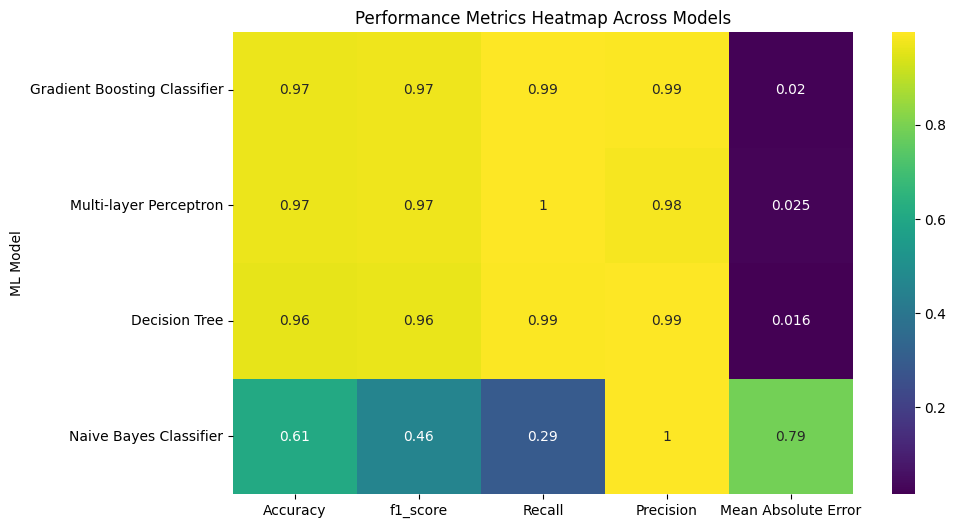

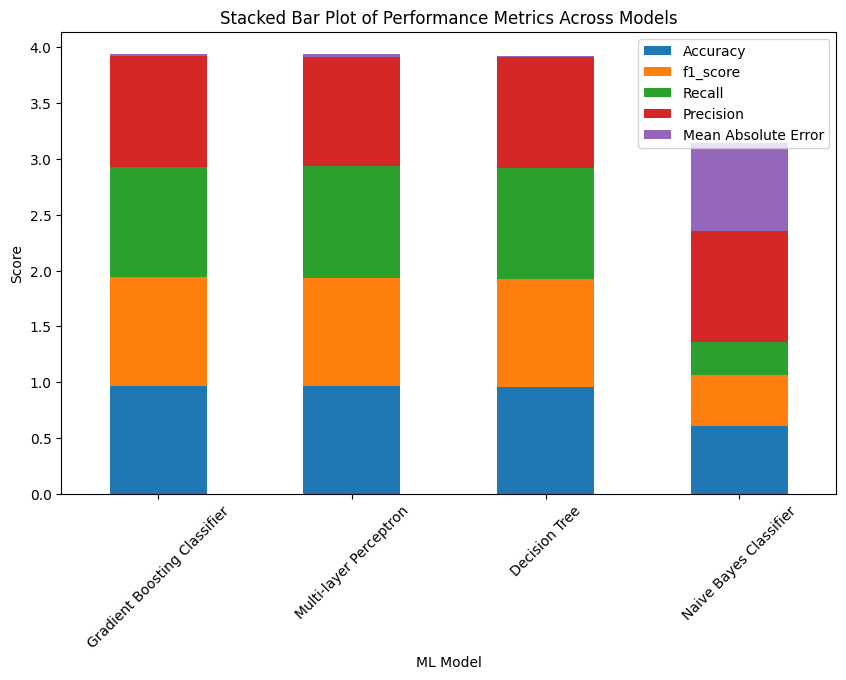

In [44]:
df = pd.DataFrame(sorted_result)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='ML Model').set_index(df['ML Model']), annot=True, cmap='viridis')
plt.title('Performance Metrics Heatmap Across Models')
plt.show()

# Stacked Bar Plot
df.set_index('ML Model', inplace=True)
df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Performance Metrics Across Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


## Storing Best Model

In [45]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [46]:
import pickle
import os
print(os.listdir("../input"))
# Save model using pickle

with open('model_pickle', 'wb') as f:
    pickle.dump(gbc, f)

# import trained model using pickle
with open('model_pickle', 'rb') as f:
    pickle_model = pickle.load(f)    

['phishing-website-detector']


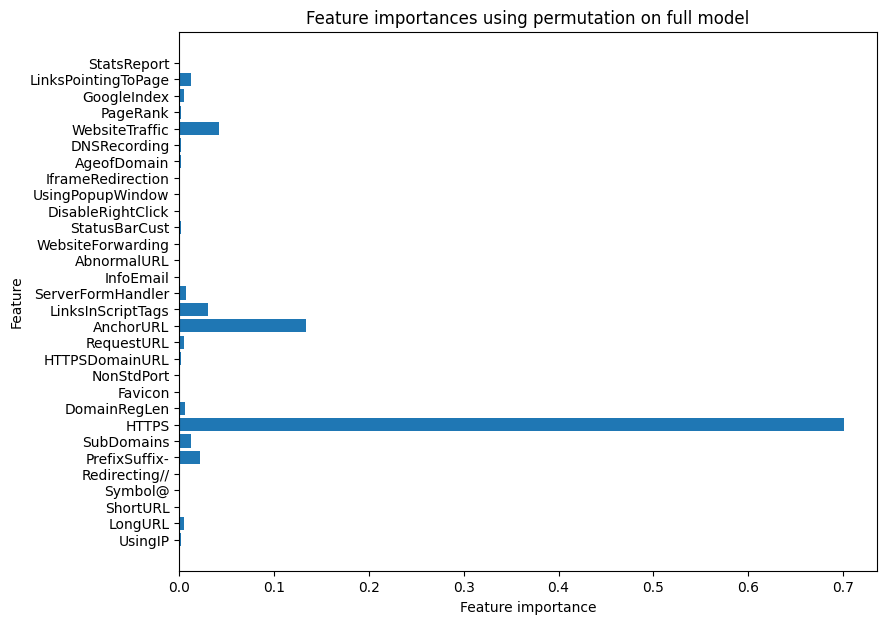

In [47]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

- **Exploring Model Variety**: Explored multiple machine learning models and conducted Exploratory Data Analysis (EDA) on the phishing dataset to understand their characteristics.

- **Feature Importance**: Learned about the critical features influencing the models' ability to identify safe or malicious URLs.

- **Model Tuning**: Gained insights into the process of fine-tuning models to optimize their performance.

- **Key Features Identified**: Recognized features such as "HTTPS", "AnchorURL", and "WebsiteTraffic" as crucial indicators for classifying URLs accurately.

- **Gradient Boosting Classifier Performance**: Highlighted the exceptional accuracy of the Gradient Boosting Classifier, achieving up to 97.4% accuracy across classes.

- **Enhanced Security Measures**: Acknowledged the significance of high model accuracy in reducing the risk associated with malicious attachments, thus bolstering security measures.

In summary, this project provided valuable insights into phishing detection, equipped with practical skills in model selection, feature analysis, and performance optimization.
